In [2]:
import geopandas

In [4]:
from shapely.geometry import Polygon

polys1 = geopandas.GeoSeries([Polygon([(0,0), (2,0), (2,2), (0,2)]),
                              Polygon([(2,2), (4,2), (4,4), (2,4)])])


polys2 = geopandas.GeoSeries([Polygon([(1,1), (3,1), (3,3), (1,3)]),
                              Polygon([(3,3), (5,3), (5,5), (3,5)])])


df1 = geopandas.GeoDataFrame({'geometry': polys1, 'df1':[1,2]})

df2 = geopandas.GeoDataFrame({'geometry': polys2, 'df2':[1,2]})

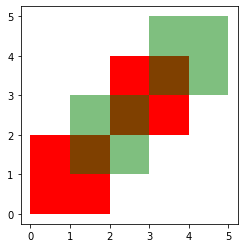

In [5]:
ax = df1.plot(color='red');

df2.plot(ax=ax, color='green', alpha=0.5);

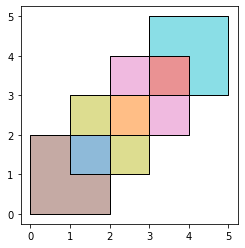

In [6]:
res_union = df1.overlay(df2, how='union')

res_union










ax = res_union.plot(alpha=0.5, cmap='tab10')

df1.plot(ax=ax, facecolor='none', edgecolor='k');

df2.plot(ax=ax, facecolor='none', edgecolor='k');

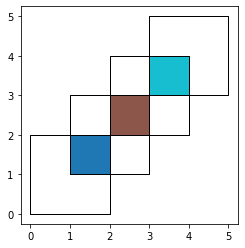

In [7]:
res_intersection = df1.overlay(df2, how='intersection')

res_intersection






ax = res_intersection.plot(cmap='tab10')

df1.plot(ax=ax, facecolor='none', edgecolor='k');

df2.plot(ax=ax, facecolor='none', edgecolor='k');

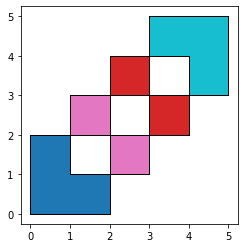

In [8]:
res_symdiff = df1.overlay(df2, how='symmetric_difference')

res_symdiff







ax = res_symdiff.plot(cmap='tab10')

df1.plot(ax=ax, facecolor='none', edgecolor='k');

df2.plot(ax=ax, facecolor='none', edgecolor='k');

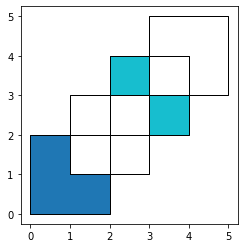

In [9]:
res_difference = df1.overlay(df2, how='difference')

res_difference





ax = res_difference.plot(cmap='tab10')

df1.plot(ax=ax, facecolor='none', edgecolor='k');

df2.plot(ax=ax, facecolor='none', edgecolor='k');

In [ ]:
res_identity = df1.overlay(df2, how='identity')

res_identity








ax = res_identity.plot(cmap='tab10')

df1.plot(ax=ax, facecolor='none', edgecolor='k');

df2.plot(ax=ax, facecolor='none', edgecolor='k');

In [10]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

capitals = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))


countries = world[world['continent'] == "South America"]

countries = countries[['geometry', 'name']]


countries = countries.to_crs('epsg:3395')

capitals = capitals.to_crs('epsg:3395')

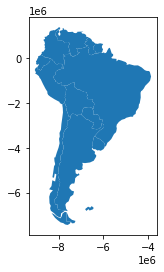

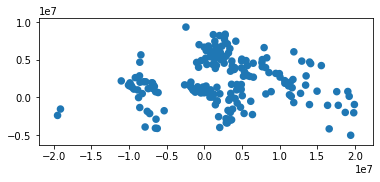

In [11]:

countries.plot();



capitals.crs

















capitals['geometry']= capitals.buffer(500000)

capitals.plot();

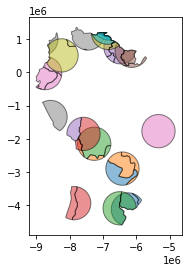

In [12]:
country_cores = countries.overlay(capitals, how='intersection')

country_cores.plot(alpha=0.5, edgecolor='k', cmap='tab10');

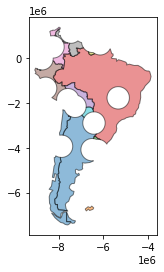

In [13]:
country_peripheries = countries.overlay(capitals, how='difference')

country_peripheries.plot(alpha=0.5, edgecolor='k', cmap='tab10');